# Introduction to NumPy

Datasets can come from a wide range of sources and a wide range of formats. It will help us to think of all data fundamentally as arrays of numbers. For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.

`numpy` (short for Numerical Python) provides an efficient interface to store and operate on dense data buffers. In some ways, `numpy` arrays are like Python's built-in list type, but `numpy` arrays provide much more efficient storage and data operations as the arrays grow larger in size. `numpy` arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use `numpy` effectively will be valuable no matter what aspect of data science interests you.

## NumPy Arrays

The `numpy` library is imported by the statement `import numpy as np`. We then set a seed for the internal pseudorandom number generator `np.random.seed(123)` to make this notebook reproducible. 

We generate 3 arrays (`x1`, `x2`, and `x3`) and examine their dimension, shape, and size properties.

In [ ]:
import numpy as np
np.random.seed(123)

x1 = np.random.randn(10,) # 1-D array
x2 = np.random.randn(10, 10) # 2-D array
x3 = np.random.randn(10, 10, 10) # 3-D array

In [ ]:
print("x3 ndim: {} shape: {} size: {}".format(x3.ndim, x3.shape, x3.size))

`matplotlib.pyplot` is a python library for plotting data. Here we create a function `plot` for plotting 2-dimensional arrays using the function `imshow`. More information on `imshow` can be found by calling `help(plt.imshow)` or reading the `matplotlib` documentation online.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot(array):
    plt.imshow(array)
    plt.show()
    plt.close()

Once created, `numpy` arrays can change dimensionality and shape while preserving array size. Here, we convert our 1-d `numpy` array into a column vector or a row vector.

In [ ]:
print(x1.reshape(10, 1))
plot(x1.reshape(10, 1))
print(x1.reshape(1, 10))
plot(x1.reshape(1, 10))

Using the `plt.subplots()` function, we can make more complex plots. Here, we use create a function `colorbar` for plotting `imshow` with a colorbar. This is also useful for creating multi-plots within the same image (see below).

In [ ]:
def colorbar(array):
    fig, ax = plt.subplots()
    im = ax.imshow(array)
    fig.colorbar(im, ax=ax)
    plt.show()
    plt.close()

In [ ]:
colorbar(x2)

The `np.stack` function combines arrays by "stacking" them along a newly-created dimension `axis`.

In [ ]:
colorbar(np.stack([x1, x1]))
colorbar(np.stack([x1, x1], axis=1))

The `np.concatenate` function concatenates a list of arrays along an existing dimension.

In [ ]:
colorbar(np.concatenate([x2, x2], axis=0))
colorbar(np.concatenate([x2, x2], axis=1))

`numpy` arrays can be indexed and slices similar to native Python lists.

In [ ]:
print(x2[:, 0].shape, x2[:, 0:1].shape, x2[:4, :4].shape)

`numpy` arrays can be split into a list of arrays using the `np.split` function

In [ ]:
x = np.arange(9).reshape((3, 3))
print(x)
xlist = np.split(x, x.shape[0], axis=0)
print(len(xlist), xlist)

## Exercise: NumPy Arrays

In addition to random number generators, there are other useful functions for creating `numpy` arrays such as `np.zeros`, `np.ones`, and `np.arange`. Use these functions to create arrays and print the resulting arrays or try visualizing them with the plotting functions we used above.

## Functions on Arrays

Computation on `numpy` arrays can be very fast, so long as one uses vectorized operations, generally implemented through `numpy`'s universal functions (ufuncs). Universal functions operate on `numpy` arrays element-wise. A comprehensive list of universal functions is available in the `numpy` documentation.

In [ ]:
x = np.linspace(0, 2*np.pi, 16)
sinx = np.sin(x)
cosx = np.cos(x)
for i in [x, sinx, cosx]: print(i)

In [ ]:
plt.plot(x, sinx)
plt.plot(x, cosx)
plt.legend(['sin(x)', 'cos(x)'])
plt.show()
plt.close()

There are even more universal functions available in the `scipy.special` library.

In [ ]:
from scipy.special import erf, erfc
x = np.linspace(0, 2, 64)
plt.plot(x, erf(x))
plt.plot(x, erfc(x))
plt.legend(['erf(x)', 'erfc(x)'])
plt.show()
plt.close()

## Statistical Operations

`numpy` provides fast routines for performing various statistical operations on arrays. Let's try out `np.sum`, `np.min`, `np.max` `np.mean`, `np.std`, and `np.median`. Here, we generate some normally-distributed random numbers, visualize the array using a histogram (`plt.hist`), and then examine the statistics of the array.

In [ ]:
x = np.random.randn(1000,)
plt.hist(x, bins=10)

In [ ]:
print(np.sum(x))
print(np.min(x))
print(np.max(x))
print(np.mean(x))
print(np.std(x))
print(np.median(x))

These statistical on arrays are also available as dot-functions. Additionally, the `np.argmin` and `np.argmax` are useful functions for finding the indices of the minimum and maximum array values, respectively.

In [ ]:
print(x.sum())
print(x.min())
print(x.max())
print(x.argmin())
print(x.argmax())

## Exercise: Dot Product

Write a function using universal functions and aggregation operations to compute the dot product of two 1-d `numpy` arrays.

In [ ]:
def dotprod(x, y):
    z = None
    return z

x = np.random.randn(12,)
y = np.random.randn(12,)
z = dotprod(x, y)
if z != None: print(z)

## Broadcasting

Broadcasting allows operations using arrays of different shape and dimensionality to be performed.

Rules of broadcasting:
1. If one of two arrays has a smaller dimension than the other, the shape of the smaller array is padded on the leading dimension (left) with ones until the number of dimensions match.
2. If the shape of the two arrays does not match along one dimension, the array with shape 1 along that dimension is "tiled" to match the shape of the other array.
3. If in any dimension the shapes do not agree and neither shape is 1, an error is raised.

In [ ]:
x = np.arange(10)
y = np.arange(10).reshape(-1, 1)
z = x*y
print(x.shape, y.shape, z.shape)
colorbar(z)

## Exercise: Standardizing data

A common practice in data science when preparing input data for modeling is perform a linear transformation on an array such that the data has zero mean and unit standard deviation. This process is called "standardization". Let's standardize our data, first the hard way and then using broadcasting.

In [ ]:
x = np.random.random((10, 5))
print(x, x.shape)
print(x.mean(axis=0), x.mean(axis=0).shape)
print(x.std(axis=0), x.std(axis=0).shape)

In [ ]:
def standardize(x):
    x_mean = np.tile(x.mean(axis=0).reshape(1, -1), (10, 1))
    x_std = np.tile(x.std(axis=0).reshape(1, -1), (10, 1))
    print(x.shape, x_mean.shape, x_std.shape)
    return (x - x_mean) / x_std

def standardize_broadcasting(x):
    return None

x = np.random.random((10, 5))
x = standardize(x)
print(x.mean(axis=0), x.std(axis=0))

x = standardize_broadcasting(x)
if x != None:
    print(x.mean(axis=0), x.std(axis=0))

# Curve Fitting

Let's examine how we can use data stored in numpy arrays to perform curve fitting.

## Polynomial Function Fitting

In this example, we attempt to fit a n-degree polynomial to the function $y(x) = sin(2x)$, where n is varied between 4-10.

In [ ]:
x = np.linspace(0, 2*np.pi, 64)
y = np.sin(2*x)

for deg in [4, 6, 8, 10]:
    z = np.polyfit(x, y, deg=deg)
    y_fit = np.poly1d(z)
    plt.plot(x, y_fit(x))
    plt.plot(x, y)
    plt.legend(['pred', 'target'])
    plt.title("poly deg: {}".format(deg))
    plt.show()
    plt.close()

Always be aware that sometimes models fit with data can perform unexpected when applied outside the training data distribution. If the model you use to fit does not match well with the model generating the data (here, using a polynomial to fit a periodic function), you may see odd results!

In [ ]:
x_pred = np.linspace(0, 2.2*np.pi, 128)

for deg in [4, 6, 8, 10]:
    z = np.polyfit(x, y, deg=deg)
    y_fit = np.poly1d(z)
    plt.plot(x_pred, y_fit(x_pred))
    plt.plot(x_pred, np.sin(2*x_pred))
    plt.legend(['pred', 'target'])
    plt.title("poly deg: {}".format(deg))
    plt.show()
    plt.close()

## Fitting Arbitrary Functions

Here, we use the `scipy.optimize.curve_fit` function to fit the same data to a periodic function. Be aware that that the starting guess for parameters has an effect on the outcome!

In [240]:
x = np.linspace(0, 2*np.pi, 64)
y = np.sin(2.0*x)

from scipy.optimize import curve_fit
def func(x, k):
    return np.sin(k*x)

pars, pcov = curve_fit(func, x, y, p0=[1.7])
print(pars, pcov)

[2.] [[0.]]


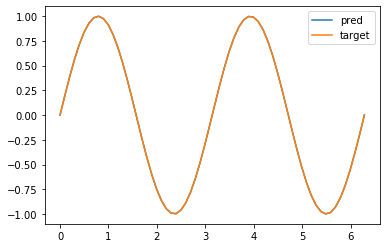

In [241]:
plt.plot(x, func(x, *pars))
plt.plot(x, y)
plt.legend(['pred', 'target'])

# Example: Estimating the Rate Constant of a First-Order Reaction

Let's consider a batch-reactor where we are performing a first-order, irreversible reaction with some species "A". In the problem, we'd like to determine the rate constant $k_1$ by measuring the concentration of species A, $C_A$, at fixed time intervals.

For a first order, irreversible reaction, we have from the law of mass action:

### $\frac{dC_A}{dt} = k_1 C_A$

The resulting first order differential equation yields the solution:

$ C_A(t) = C_{A,0} exp(-k_1t)$

where $C_{A,0}$ is the starting concentration of species A

## Generating Data

In lieu of collection actual measurements, we will generate synthetic data using the solution to the ODE and add random noise to represent "measurement error"

In [ ]:
k = 0.5 # s-1
Ca_0 = 10.0 # mol
noise = 5e-1 # measurement error
t = np.linspace(0, 10, 20)
Ca = Ca_0 * np.exp(-k*t)
Ca += noise * np.random.randn(*Ca.shape)
plt.scatter(t, Ca)

## Estimating the Rate Constant with Imperfect Data

Let's use `curve_fit` to determine the rate constant $k_1$ given our "measurement" data and functional form of the concentration as a function of time.